# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_study_results["Mouse ID"].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_study_results.groupby(["Mouse ID", "Timepoint"]).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mask = mouse_study_results["Mouse ID"]== "g989"
mouse_study_results.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask=mouse_study_results["Mouse ID"] != "g989"
mice_study_results = mouse_study_results.loc[mask].reset_index(drop=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_study_results["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
avg_tumor_vol = mice_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_tumor_vol =mice_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_vol=mice_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_vol=mice_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_vol=mice_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_vol_sum = pd.DataFrame({
    "Average":avg_tumor_vol,
    "Median":med_tumor_vol,
    "Variance":var_tumor_vol,
    "Standard Dev":std_tumor_vol,
    "SEM":sem_tumor_vol
})

tumor_vol_sum

,Average,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: title={'center': 'Rows Per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Row Counts'>

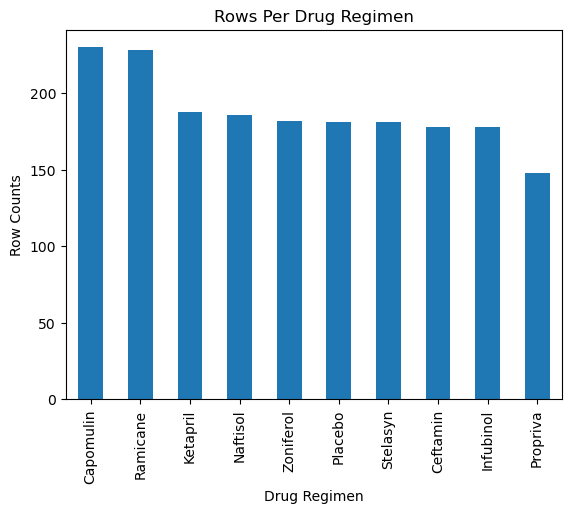

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_study_results.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Rows Per Drug Regimen", ylabel="Row Counts")

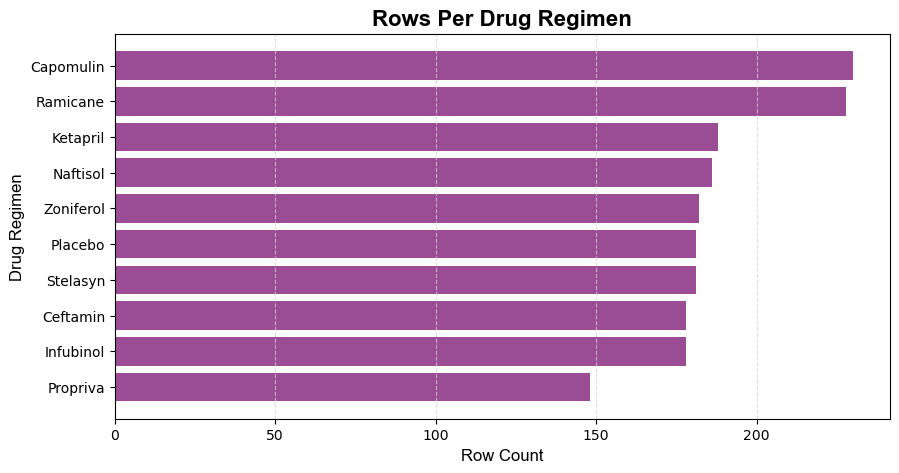

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Data Viz Recipe
data = mice_study_results["Drug Regimen"].value_counts().sort_values()

# Change Canvas Size
plt.figure(figsize=(10, 5))

# Create a basic plot
plt.barh(data.index, data.values, color="#9A4C95", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Row Count", fontfamily="Arial", fontsize=12)
plt.ylabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.title("Rows Per Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

<Axes: title={'center': 'Distribution of Unique Sex'}>

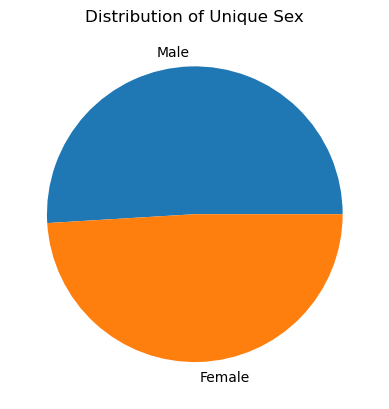

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_study_results.groupby("Sex").nunique

# Make the pie chart
mice_study_results.groupby("Sex").size().sort_values(ascending=False).plot(kind="pie", title="Distribution of Unique Sex")

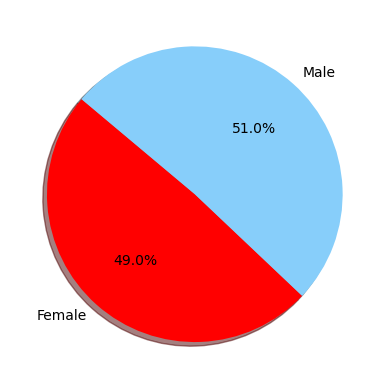

In [26]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]

# Get the unique mice with their gender
mice_study_results.groupby("Sex").size().sort_values(ascending=False)

    # Make the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint =df2.groupby("Mouse ID").Timpoint.max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3=pd.merge(max_timepoint, df2, on=["Mouse ID", "Timepoint"], how="left"

KeyError: 'Drug Regimen'

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
